#Workflow Summary


1.   Data Ingestion: Read polyline data from CSV files.
2.   Regularization: Identify and regularize geometric primitives.
3.   Symmetry: Detect and enhance symmetry in shapes.
4.   Completion: Handle occlusions and complete the curves.
5.   Conversion: Convert polylines to cubic Bezier curves.
6.   Visualization: Generate and render SVG files for evaluation.









#Required libraries

In [ ]:
!pip install svgwrite cairosvg

#Step 2: Data Reading and Visualization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [ ]:
def plot(paths_XYs):

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], linewidth=2)
    ax.set_aspect('equal')
    plt.show()

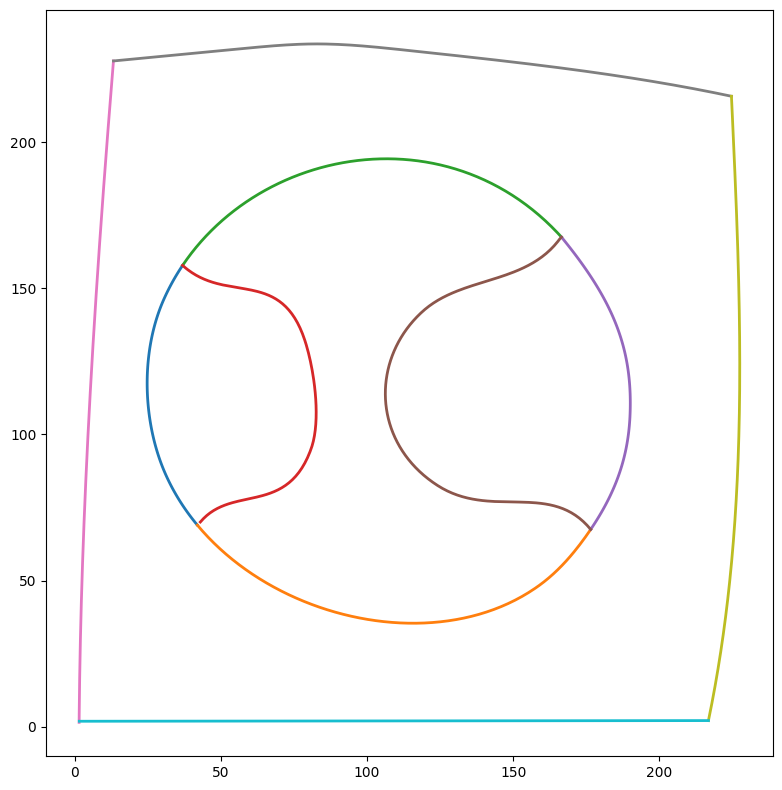

In [ ]:
csv_path = '/content/frag0.csv'
paths_XYs = read_csv(csv_path)
plot(paths_XYs)

In [ ]:
print(type(paths_XYs), type(paths_XYs[0]), type(paths_XYs[0][0]), "size",len(paths_XYs), "first index", paths_XYs[0])

<class 'list'> <class 'list'> <class 'numpy.ndarray'> size 10 first index [array([[ 41.94200134,  68.98000336],
       [ 41.25960541,  69.81170654],
       [ 40.58875275,  70.65237427],
       [ 39.92960739,  71.50195312],
       [ 39.28233719,  72.36040497],
       [ 38.6471138 ,  73.22766876],
       [ 38.02410889,  74.10371399],
       [ 37.4134903 ,  74.98847961],
       [ 36.81542969,  75.88191986],
       [ 36.23009109,  76.78398895],
       [ 35.65765381,  77.69464874],
       [ 35.09827805,  78.6138382 ],
       [ 34.55213928,  79.54151917],
       [ 34.01940155,  80.47764587],
       [ 33.50024414,  81.42215729],
       [ 32.99482727,  82.37502289],
       [ 32.50332642,  83.33618164],
       [ 32.02590561,  84.30560303],
       [ 31.56274223,  85.28321838],
       [ 31.11400032,  86.26899719],
       [ 30.73366356,  87.13911438],
       [ 30.36473846,  88.0182724 ],
       [ 30.00725937,  88.90615845],
       [ 29.6612606 ,  89.80249023],
       [ 29.3267765 ,  90.70696259],


#Step 3: Regularization Module


In [ ]:


def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def regularize_straight_lines(XYs):
    if len(XYs) < 2:
        return XYs
    p1, p2 = XYs[0], XYs[-1]
    new_XYs = np.array([p1, p2])
    return new_XYs

def regularize_circles_ellipses(XYs):
    if len(XYs) < 5:
        return XYs
    center = np.mean(XYs, axis=0)
    radius = np.mean([distance(center, XY) for XY in XYs])
    new_XYs = np.array([[center[0] + radius * np.cos(t), center[1] + radius * np.sin(t)] for t in np.linspace(0, 2 * np.pi, len(XYs))])
    return new_XYs

def regularize_rectangles(XYs):
    if len(XYs) != 4:
        return XYs
    min_x, min_y = np.min(XYs, axis=0)
    max_x, max_y = np.max(XYs, axis=0)
    new_XYs = np.array([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y], [min_x, min_y]])
    return new_XYs

def regularize_polygons(XYs):
    n = len(XYs)
    if n < 3:
        return XYs
    center = np.mean(XYs, axis=0)
    radius = np.mean([distance(center, XY) for XY in XYs])
    new_XYs = np.array([[center[0] + radius * np.cos(2 * np.pi * i / n), center[1] + radius * np.sin(2 * np.pi * i / n)] for i in range(n)])
    return new_XYs

def regularize_star_shapes(XYs):
    n = len(XYs) // 2
    if n < 3:
        return XYs
    center = np.mean(XYs, axis=0)
    outer_radius = np.mean([distance(center, XYs[i]) for i in range(0, len(XYs), 2)])
    inner_radius = np.mean([distance(center, XYs[i]) for i in range(1, len(XYs), 2)])
    new_XYs = []
    for i in range(n):
        angle = 2 * np.pi * i / n
        new_XYs.append([center[0] + outer_radius * np.cos(angle), center[1] + outer_radius * np.sin(angle)])
        angle += np.pi / n
        new_XYs.append([center[0] + inner_radius * np.cos(angle), center[1] + inner_radius * np.sin(angle)])
    return np.array(new_XYs)

def regularize_curves(paths_XYs):
    for i, XYs in enumerate(paths_XYs):
        for j, XY in enumerate(XYs):
            XYs[j] = regularize_straight_lines(XY)
            XYs[j] = regularize_circles_ellipses(XY)
            XYs[j] = regularize_rectangles(XY)
            XYs[j] = regularize_polygons(XY)
            XYs[j] = regularize_star_shapes(XY)
    return paths_XYs

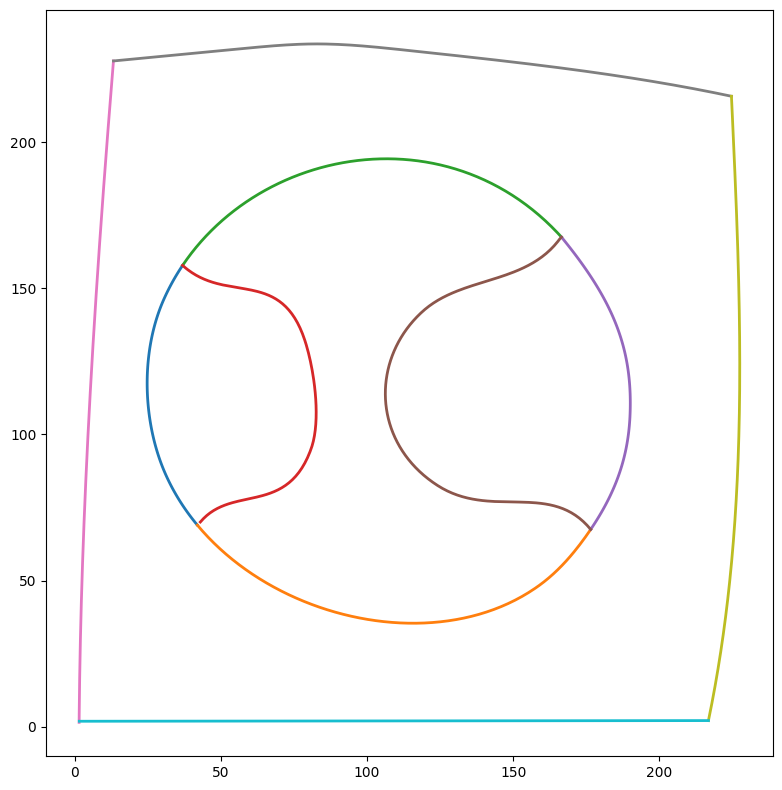

In [ ]:
regularized_paths = regularize_rectangles(paths_XYs)
plot(regularized_paths)

#Step 4: Symmetry Detection Module



In [ ]:
def detect_symmetry(XYs):
    n = len(XYs)
    if n < 2:
        return XYs
    mid = n // 2
    if np.allclose(XYs[:mid], XYs[mid:][::-1]):
        return XYs
    return XYs

def apply_symmetry(paths_XYs):
    for i, XYs in enumerate(paths_XYs):
        for j, XY in enumerate(XYs):
            XYs[j] = detect_symmetry(XY)
    return paths_XYs

#Step 5: Curve Completion Module


In [ ]:
def complete_curve(XYs):
    if len(XYs) < 2:
        return XYs
    new_XYs = XYs.copy()
    for i in range(len(XYs) - 1):
        if distance(XYs[i], XYs[i+1]) > 10:
            new_XYs = np.insert(new_XYs, i+1, (XYs[i] + XYs[i+1]) / 2, axis=0)
    return new_XYs

def complete_curves(paths_XYs):
    for i, XYs in enumerate(paths_XYs):
        for j, XY in enumerate(XYs):
            XYs[j] = complete_curve(XY)
    return paths_XYs

#Step 6: Bezier Curve Conversion


In [ ]:
from scipy.interpolate import splprep, splev

def polyline_to_bezier(XYs):
    tck, u = splprep([XYs[:, 0], XYs[:, 1]], s=0)
    new_points = splev(np.linspace(0, 1, 100), tck)
    return np.array(new_points).T

def convert_to_bezier(paths_XYs):
    bezier_paths = []
    for i, XYs in enumerate(paths_XYs):
        new_XYs = []
        for XY in XYs:
            new_XYs.append(polyline_to_bezier(XY))
        bezier_paths.append(new_XYs)
    return bezier_paths

plotting the original shape


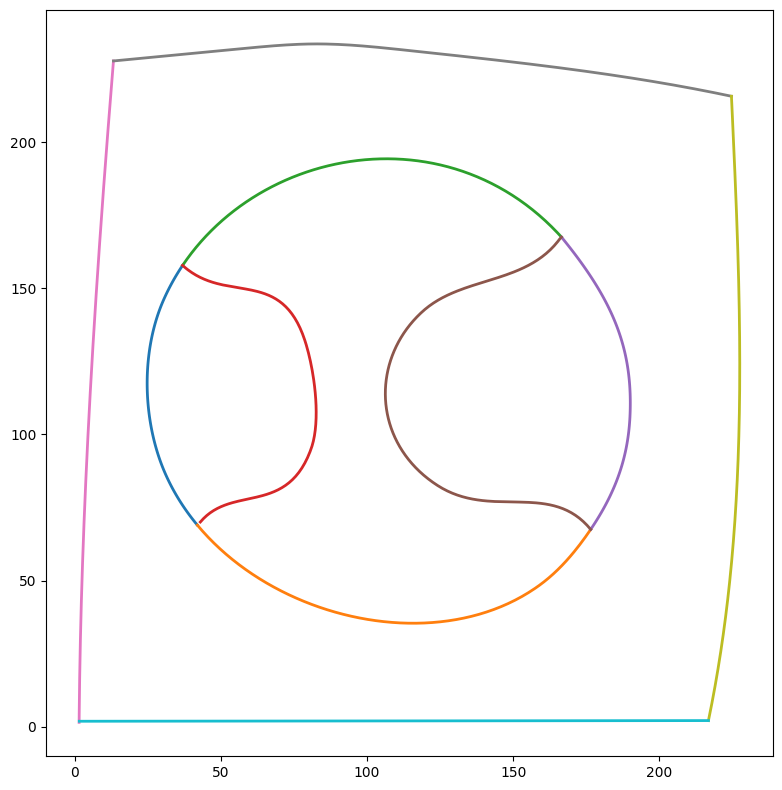

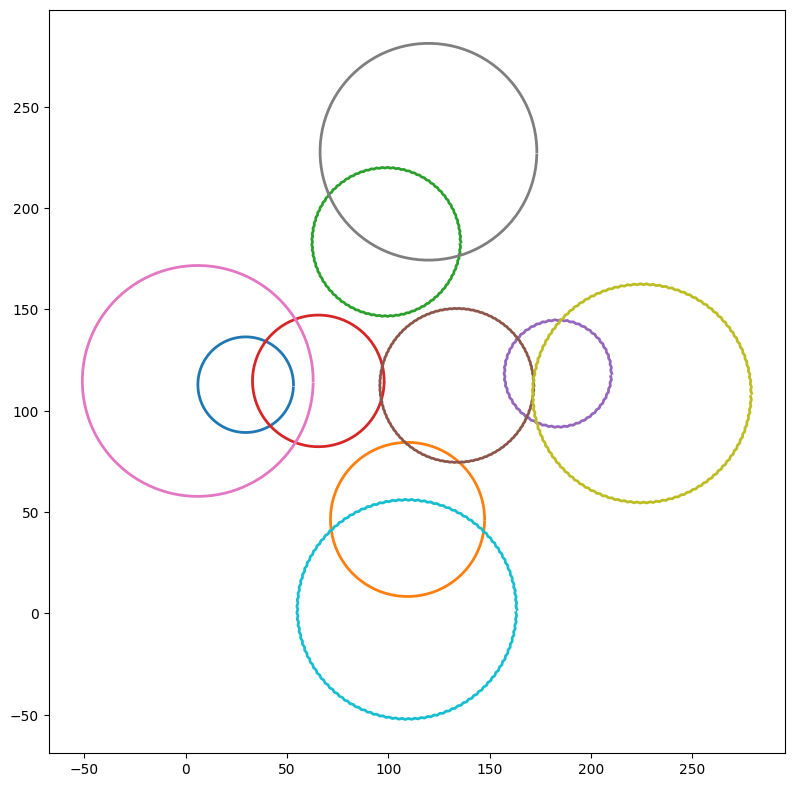

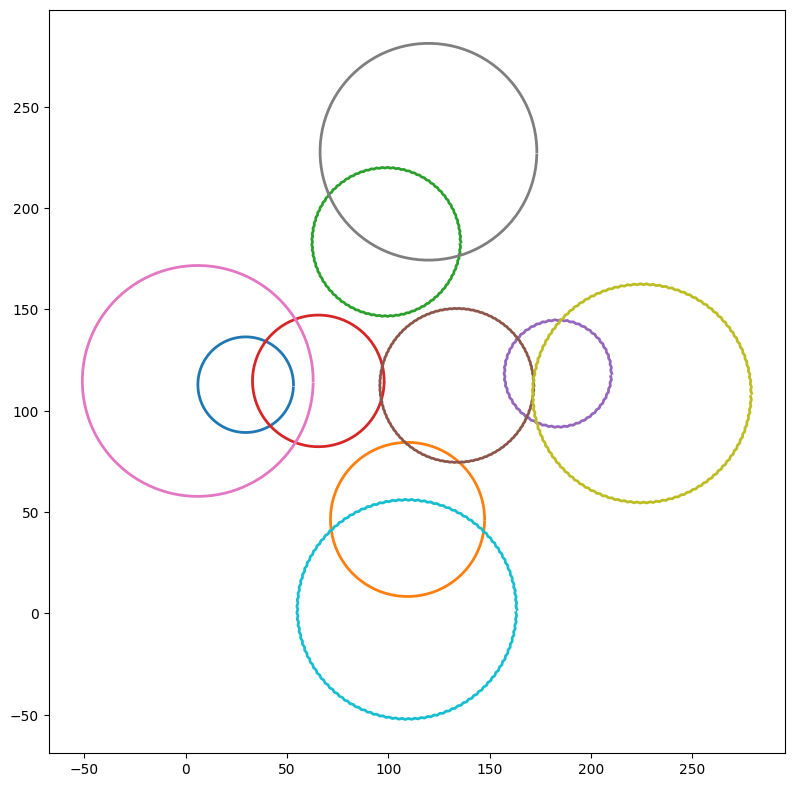

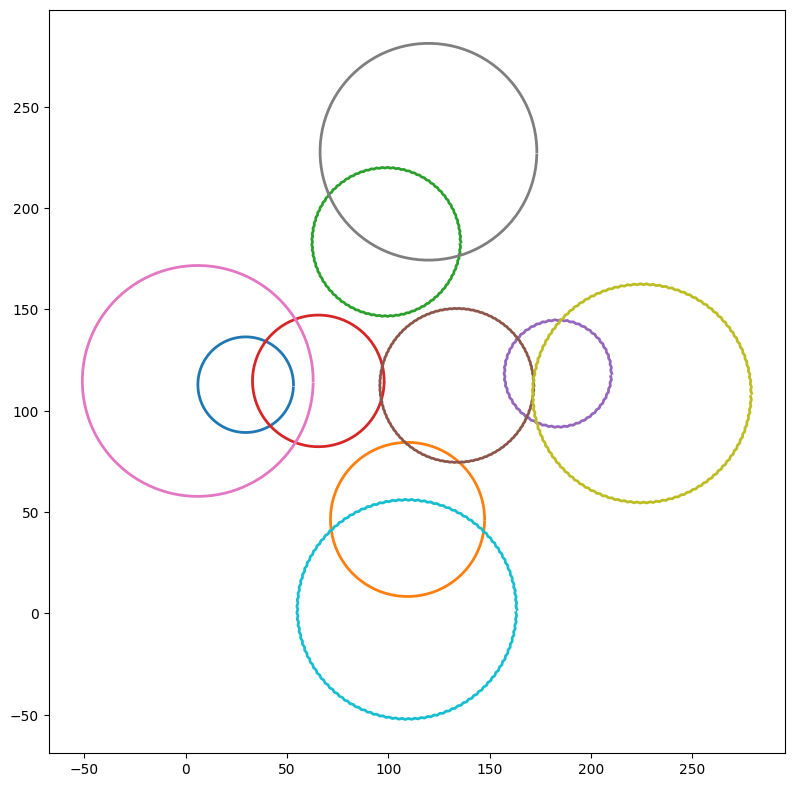

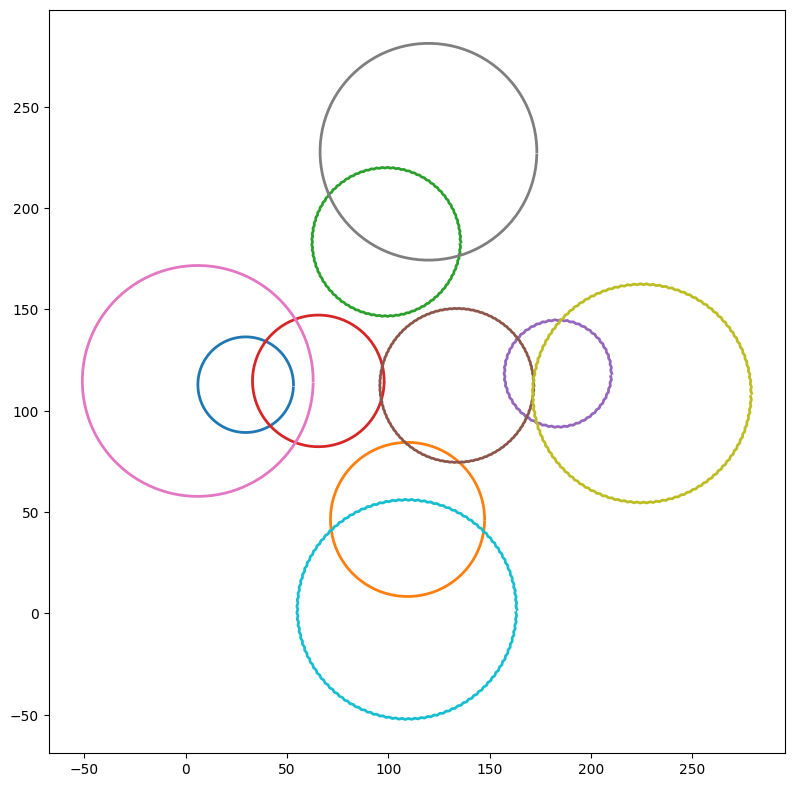

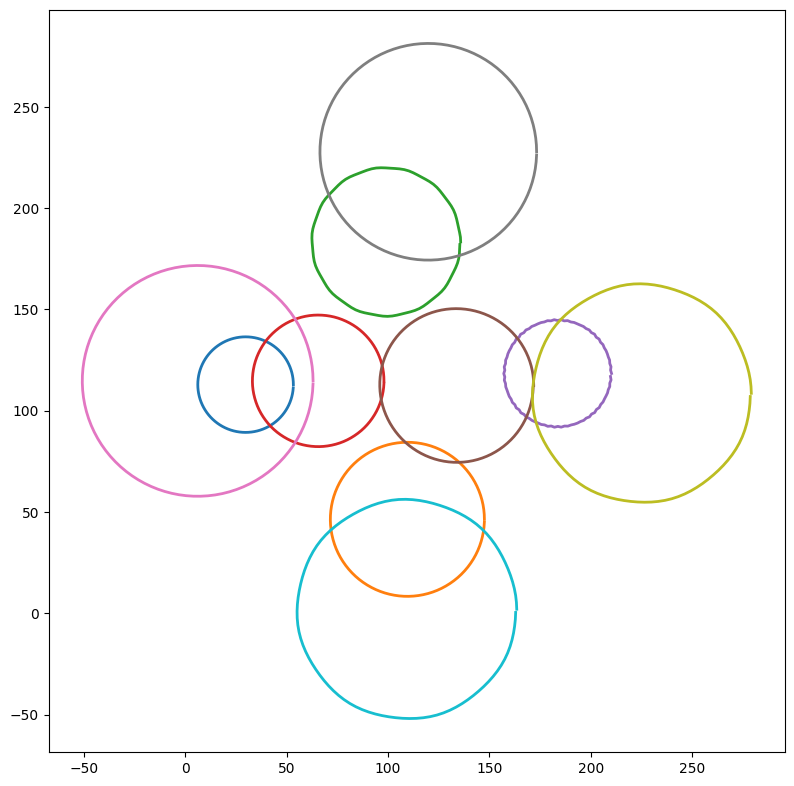

In [ ]:
csv_path = "/content/frag0.csv"
paths_XYs = read_csv(csv_path)
print("plotting the original shape")
plot(paths_XYs)

regularized_paths = regularize_curves(paths_XYs)
plot(regularized_paths)

regularized_paths = regularize_curves(paths_XYs)
plot(regularized_paths)

symmetric_paths = apply_symmetry(regularized_paths)
plot(symmetric_paths)

completed_paths = complete_curves(symmetric_paths)
plot(completed_paths)

bezier_paths = convert_to_bezier(completed_paths)
plot(bezier_paths)

#Step 7: SVG Generation and Rasterization


In [ ]:
# import svgwrite
# import cairosvg

# def polylines2svg(paths_XYs, svg_path):
#     W, H = 0, 0
#     for path_XYs in paths_XYs:
#         for XY in path_XYs:
#             W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
#     padding = 0.1
#     W, H = int(W + padding * W), int(H + padding * H)
#     dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
#     group = dwg.g()
#     for path in paths_XYs:
#         path_data = []
#         for XY in path:
#             path_data.append(("M", (XY[0, 0], XY[0, 1])))
#             for j in range(1, len(XY)):
#                 path_data.append(("L", (XY[j, 0], XY[j, 1])))
#             if not np.allclose(XY[0], XY[-1]):
#                 path_data.append(("Z", None))
#         group.add(dwg.path(d=path_data, fill='none', stroke='black', stroke_width=2))
#     dwg.add(group)
#     dwg.save()
#     png_path = svg_path.replace('.svg', '.png')
#     fact = max(1, 1024 // min(H, W))
#     cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')
#     return

# svg_path = 'output.svg'
# polylines2svg(bezier_paths, svg_path)
